# Classifcador de folhas saudável/dontes

## Objetivo:

O objetivo desse colab é fazer o uso de uma deep learning para fazer a classificação de folhas saudáveis ou doentes do dataset https://www.kaggle.com/datasets/arjuntejaswi/plant-village.

Esse dataset possui 15 classes com 20638 amostras variando entre imagens de folhas de pimentas, tomates e batatas.



## Problema do negócio:

Todos os anos, os agricultores enfrentam perdas económicas e desperdícios de colheitas devido a várias doenças nas plantas em suas plantações. A requeima e a folhagem precoce são as principais encotradas. Estima-se que a maior perda ocorrida na produtividade seja devido a essas doenças. Assim as imagens são classificadas em 3 classes: 

*   Requeima
*   Folhagem precoce
*   Saudável

## Pipeline:

Para esse projeto iremos fazer o download do dataset, fazer alguns pré processamento, dividir em treino, validação e teste, coonstruir uma rede Alexnet, treinar o modelo, avaliar e salvar o modelo

##Intuição Alexnet:

 AlexNet foi projetado por Hinton, vencedor do concurso ImageNet de 2012, e seu aluno Alex Krizhevsky.  Foi também depois desse ano que redes neurais cada vez mais profundas foram propostas, como o excelente vgg, GoogleLeNet.  Seu modelo de dados oficial tem uma taxa de precisão de 57,1% e o top 1-5 chega a 80,2%.  Isso já é bastante notável para algoritmos tradicionais de classificação de aprendizado de máquina.

![Alexnet arc](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/alexnet2.png)



## Ambiente de execucao

In [ ]:
!pip install tensorflow==2.8

!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 1.4 MB 35.7 MB/s 
     |████████████████████████████████| 5.8 MB 50.5 MB/s 
     |████████████████████████████████| 462 kB 68.0 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1


## Download od Dataset

Para realizar é preciso do json da API do Kaggle para donwloda do dataset

In [ ]:
import os

# Lendo as crendenciais para download do dataset
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

# Download do dataset
#!kaggle datasets download -d ashokkumarpalivela/potato-diseases
!kaggle datasets download -d arjuntejaswi/plant-village


#Descompressao do dataset
#!unzip /content/potato-diseases.zip -d /content/kaggle/
!unzip /content/plant-village.zip -d /content/kaggle/


A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: /content/kaggle/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Vir

In [ ]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization, Dropout
from keras.regularizers import L2
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, BackupAndRestore
from keras.preprocessing.image import ImageDataGenerator, image_dataset_from_directory


In [ ]:
# Parametros universais

IMAGE_SIZE = 227
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
FILE_PATH="/content/kaggle/PlantVillage"



# Organizar o dataset 
dataset = image_dataset_from_directory(
            directory=FILE_PATH,
            shuffle=True,
            image_size=(IMAGE_SIZE,IMAGE_SIZE),
            batch_size = BATCH_SIZE,
)

Found 20638 files belonging to 15 classes.


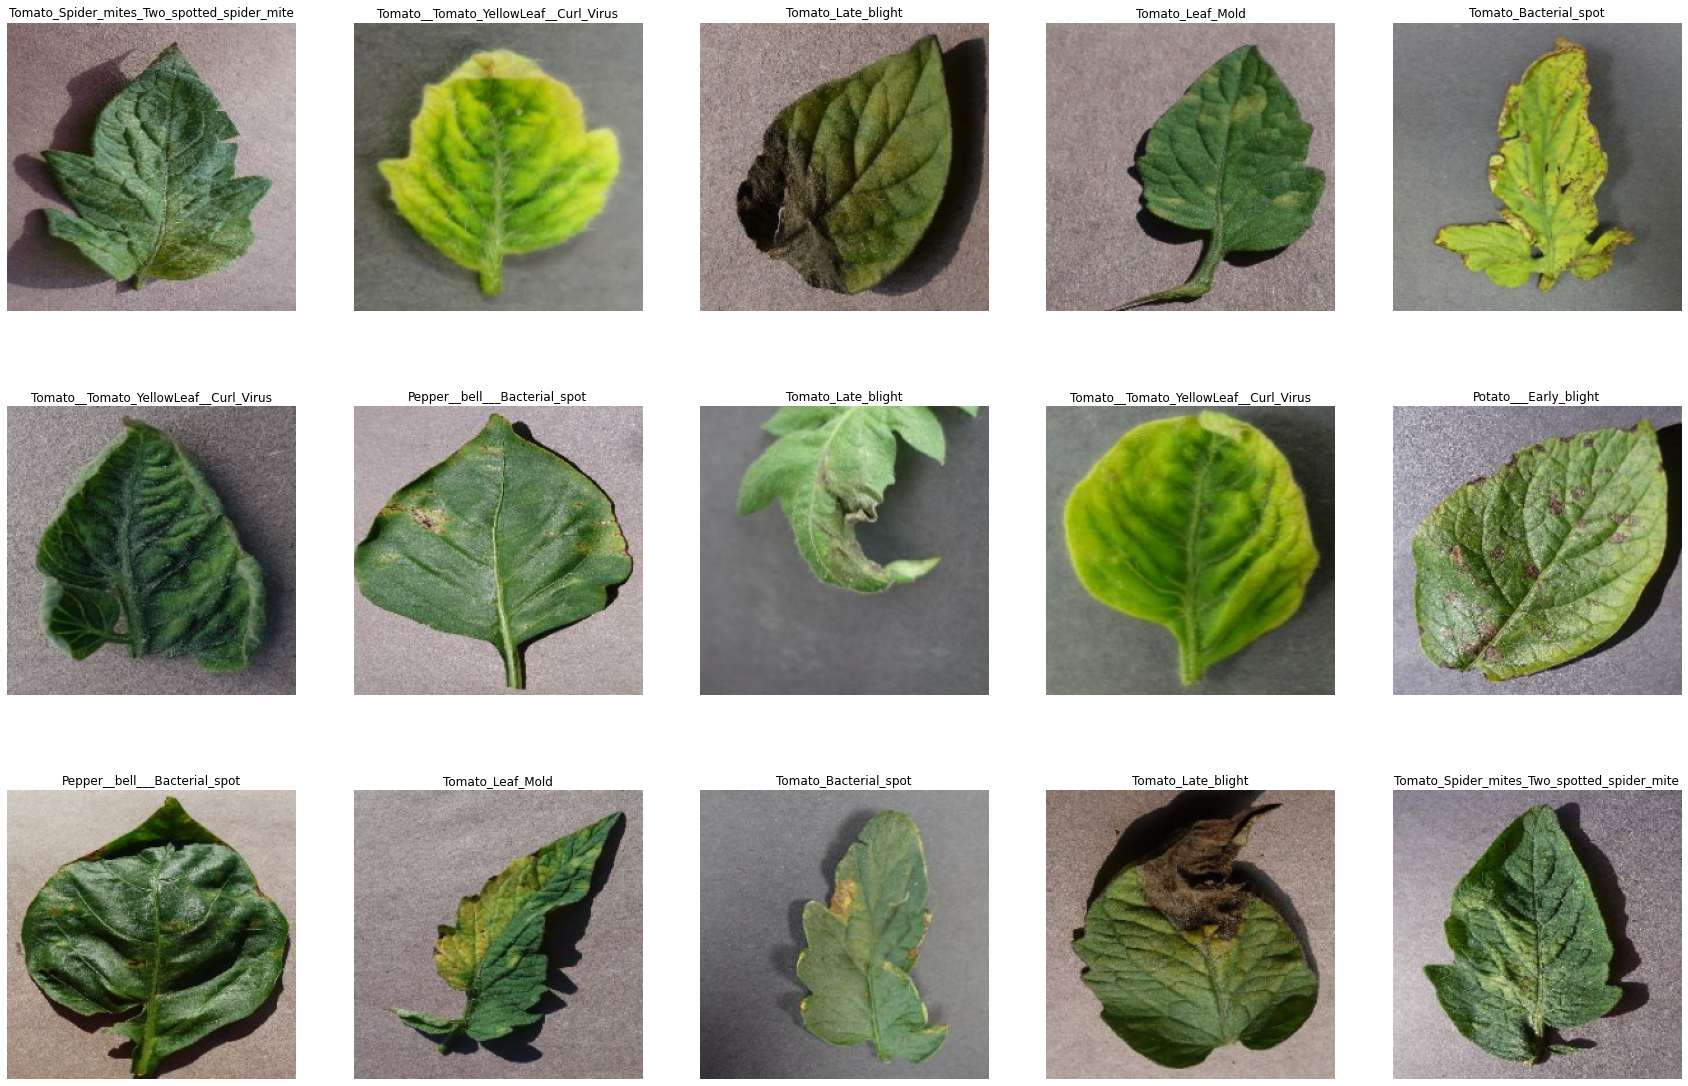

In [ ]:

# Plot das imagens do dataset
plt.figure(figsize=(30,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title( dataset.class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape) # Verificando o shape
    print(label_batch.numpy()) # Verificando as classes

  

(32, 227, 227, 3)
[12  9 13 14  9  0  3 10 12 12 12 14  0  7 12 12 11 14 10  5  2  0  2  8
  9 11 11 10 14  7  8  9]


In [ ]:

# Train test split
def get_dataset_partitions(ds, train_split=0.8, test_split=0.1, valid_split=0.1, shuffle=True, shuffle_size=10000):

    # Verificacao de quantidade de sepracao do dataset esta correta
    assert  train_split + test_split + valid_split == 1
    
    ds_size = len(ds)
    if shuffle:
        ds.shuffle(shuffle_size, seed=42)

    train_size = int(len(ds)*train_split)
    valid_size = int(len(ds)*valid_split)

  
    train_ds = ds.take(train_size)
    valid_ds = ds.skip(train_size).take(valid_size)

    test_ds = ds.skip(train_size).skip(valid_size)
    
    return train_ds ,test_ds, valid_ds
    

train_ds ,test_ds, valid_ds = get_dataset_partitions(dataset)


print(f"O dataset de treino possui: {len(train_ds)}")
print(f"O dataset de teste possui: {len(test_ds)}")
print(f"O dataset de validacao possui: {len(valid_ds)}")



O dataset de treino possui: 516
O dataset de teste possui: 65
O dataset de validacao possui: 64


In [ ]:
# EAD

class_name = dataset.class_names

### Arquitetura da alexnet

In [ ]:
# Alexnet
inputShape=(227,227,3)
model = Sequential()


# 1 layer
model.add(Conv2D(96, kernel_size=11, strides=4, padding="VALID", activation="relu", input_shape=inputShape))
model.add(MaxPool2D(pool_size=3, strides=2, padding='VALID'))
model.add(BatchNormalization())

# 2 layer
model.add(Conv2D(256, kernel_size=5, strides=1, padding="SAME", activation="relu", kernel_regularizer=L2(0.0005)))
model.add(MaxPool2D(pool_size=3, strides=2, padding="VALID"))
model.add(BatchNormalization())

# 3 layer
model.add(Conv2D(384, kernel_size=3, strides=1, padding="SAME", activation='relu', kernel_regularizer=L2(0.0005)))
model.add(BatchNormalization())

# 4 layer
model.add(Conv2D(384, kernel_size=3, strides=1, padding="SAME", activation='relu', kernel_regularizer=L2(0.0005)))
model.add(BatchNormalization())

# 5 layer
model.add(Conv2D(256, kernel_size=3, strides=1, padding="SAME", activation='relu', kernel_regularizer=L2(0.0005)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=3, strides=2, padding="VALID"))

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                        

### Treinamento

In [ ]:
callback = [
    EarlyStopping(monitor='loss', patience=5, mode="auto"), 
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True, monitor='val_loss', mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')
    ]

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)


history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=valid_ds,
    verbose=1,
    epochs=50,
    callbacks=[callback]  
)


Epoch 1/50
516/516 [==============================] - 67s 113ms/step - loss: 4.2024 - accuracy: 0.3906 - val_loss: 2.1991 - val_accuracy: 0.5103 - lr: 0.0010
Epoch 2/50
516/516 [==============================] - 48s 93ms/step - loss: 2.4012 - accuracy: 0.4686 - val_loss: 3.6966 - val_accuracy: 0.2290 - lr: 0.0010
Epoch 3/50
516/516 [==============================] - 48s 93ms/step - loss: 2.0017 - accuracy: 0.5369 - val_loss: 4.6030 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 4/50
516/516 [==============================] - 50s 96ms/step - loss: 1.7473 - accuracy: 0.5866 - val_loss: 2.0106 - val_accuracy: 0.4907 - lr: 0.0010
Epoch 5/50
516/516 [==============================] - 50s 96ms/step - loss: 1.5469 - accuracy: 0.6262 - val_loss: 1.9869 - val_accuracy: 0.4951 - lr: 0.0010
Epoch 6/50
516/516 [==============================] - 48s 92ms/step - loss: 1.4697 - accuracy: 0.6470 - val_loss: 2.1543 - val_accuracy: 0.4385 - lr: 0.0010
Epoch 7/50
516/516 [==============================] - 53s

In [ ]:
import re
import os
files = os.listdir("/content")
r = re.compile(".*h5")
newlist = list(filter(r.match, files)) 
newlist.sort(key = lambda x: x.split())


In [ ]:
model = tf.keras.models.load_model(newlist[-1])
(_, acc) = model.evaluate(valid_ds)
print("[INFO] test accuracy: {:.2f}%...".format(acc * 100))

64/64 [==============================] - 19s 40ms/step - loss: 0.9568 - accuracy: 0.8022
[INFO] test accuracy: 80.22%...


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


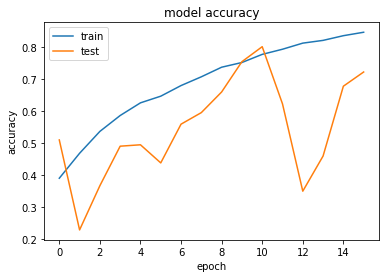

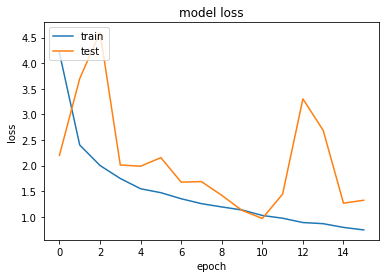

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

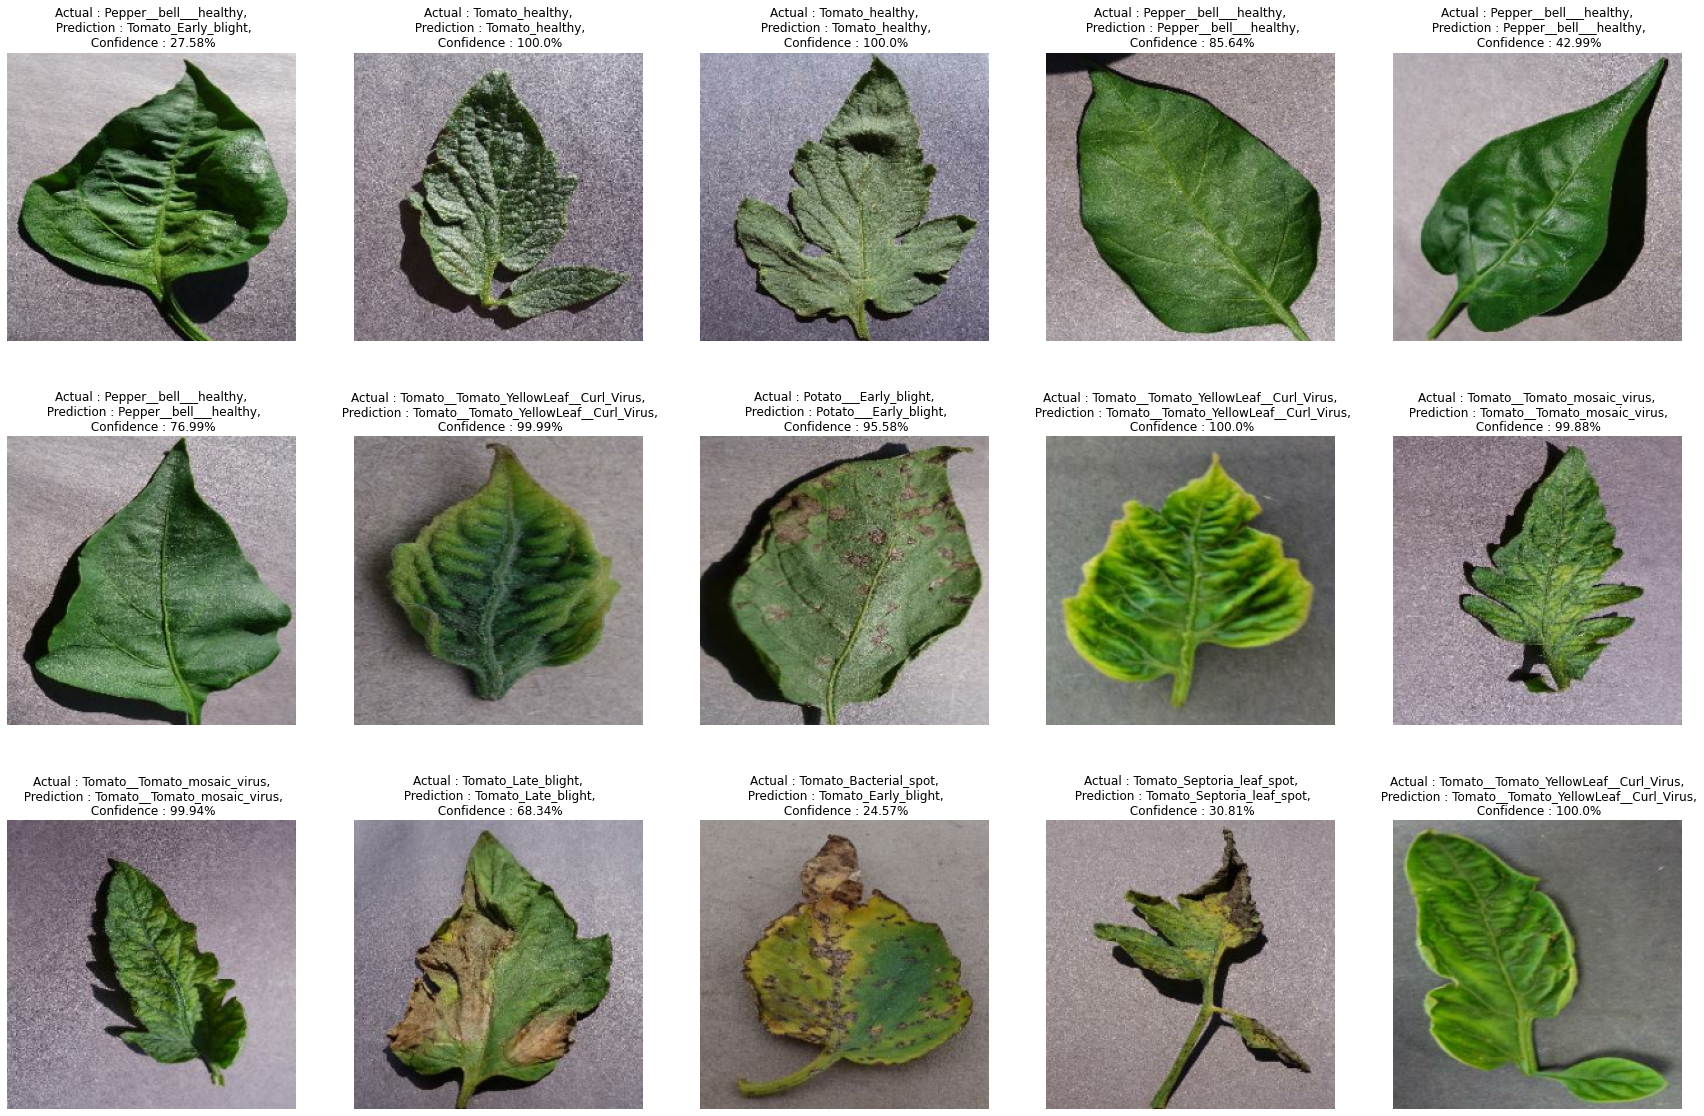

In [ ]:
plt.figure(figsize = (30,20))
for batch_image, batch_label in test_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_name[batch_label[i]]
    
        plt.imshow(image)
    
        batch_prediction = model.predict(batch_image)
        predicted_class = class_name[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)
        
        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')
    
        plt.axis('off')

### Salvando o modelo

In [ ]:
model.save(f"best_model_alexnet_{newlist[-1]}")

